##**1. Overview**

**Objective :**
This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

**Data Description** :

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.


**Attribute Information :**


Following is the Data Dictionary for customer's credit card dataset :-


**CUSTID :** Identification of Credit Card holder (Categorical)

**BALANCE :** Balance amount left in their account to make purchases

**BALANCEFREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES :** Amount of purchases made from account

**ONEOFFPURCHASES :** Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES :** Amount of purchase done in installment

**CASHADVANCE :** Cash in advance given by the user

**PURCHASESFREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX :** Numbe of purchase transactions made

**CREDITLIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user

**MINIMUM_PAYMENTS :** Minimum amount of payments made by user

**PRCFULLPAYMENT :** Percent of full payment paid by user

**TENURE :** Tenure of credit card service for user

##**2. Import Libraries:**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
#installing package of factor analyzer
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 806.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 47.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=fedf97df0149d8a7f7cffdbf3a183b30161f9d4bb140cf47d0eb9919256637ea
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##3. Load Dataset:

In [3]:
df=pd.read_csv("/content/drive/MyDrive/DATA PYTHON/Customer Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
col=df.columns
col

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Balance are right skewed distribution and highest Balance is 19043, Compare with purhcase and ONE Off Purchase,installments  Total amount paid purchase are more compare to installement pruchase and One  off purchase are similar to purchase, moreover 39% are purhcasing product towards installment purchase

In [8]:
mn=df["CREDIT_LIMIT"].mean()
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(mn)

In [9]:
mns=df["MINIMUM_PAYMENTS"].mean()
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(mns)

##3. Load Dataset:

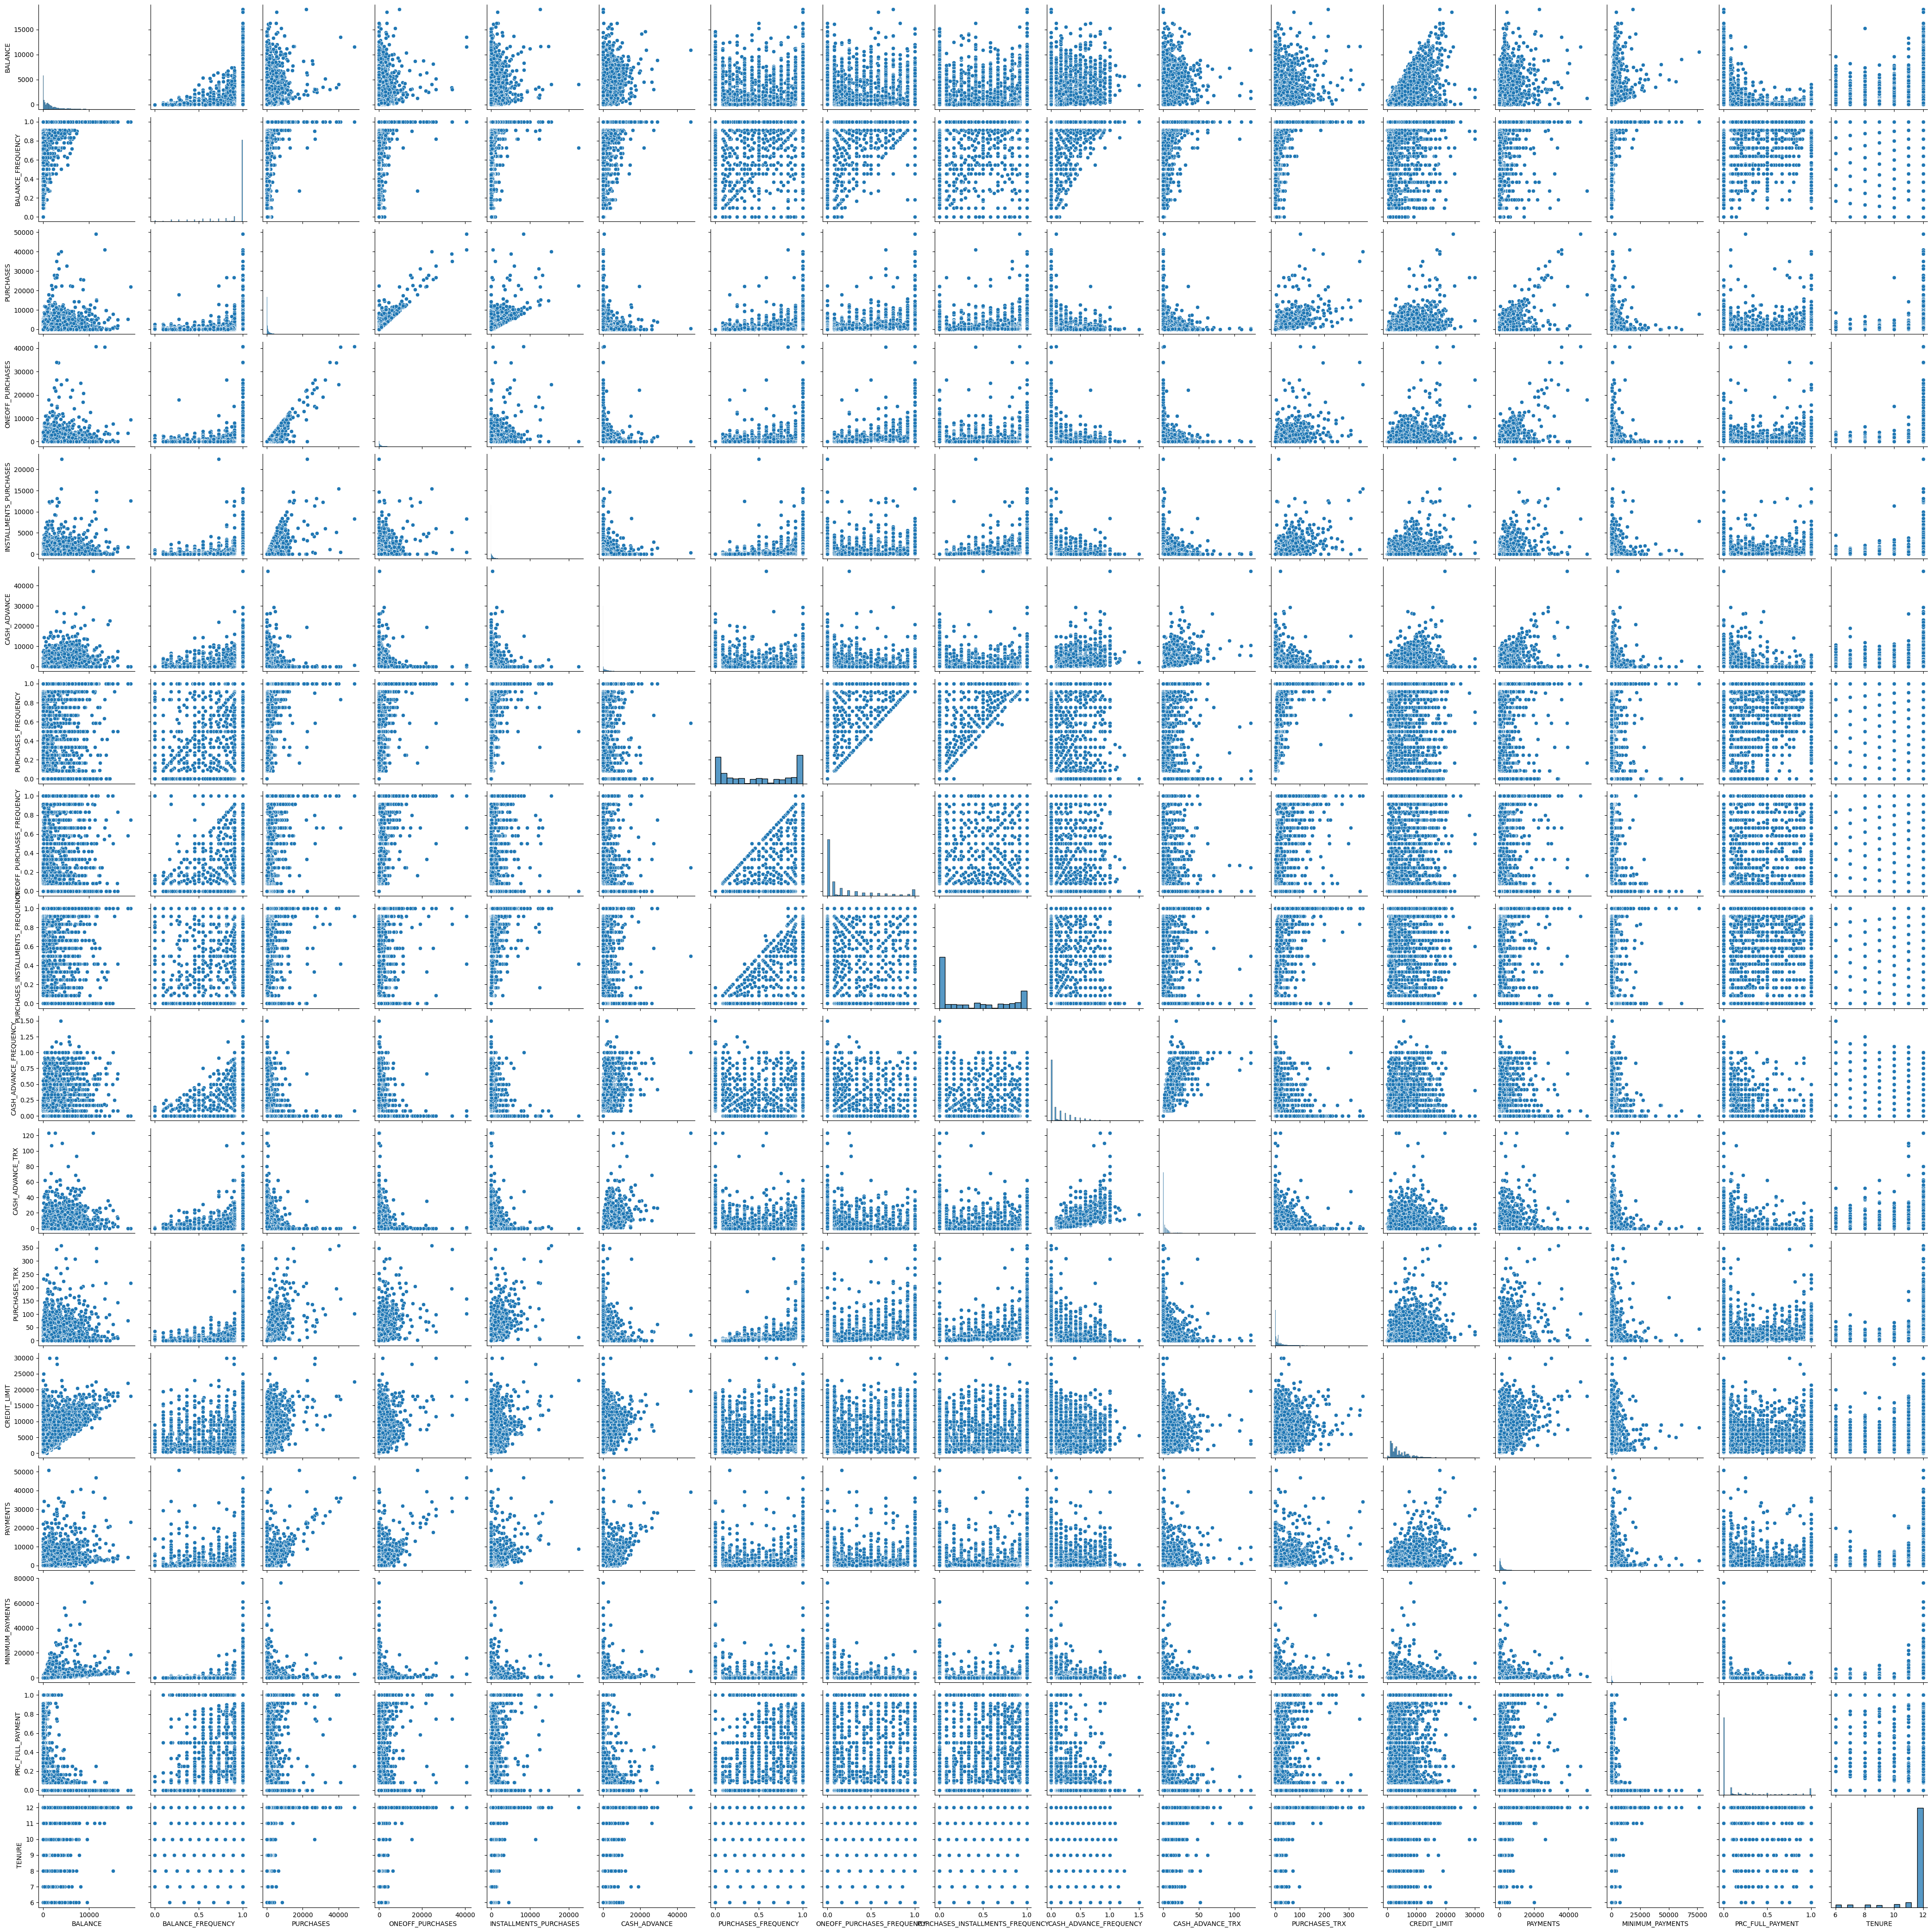

In [ ]:
sns.pairplot(data=df)

<ipython-input-24-35a1fa8f58a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

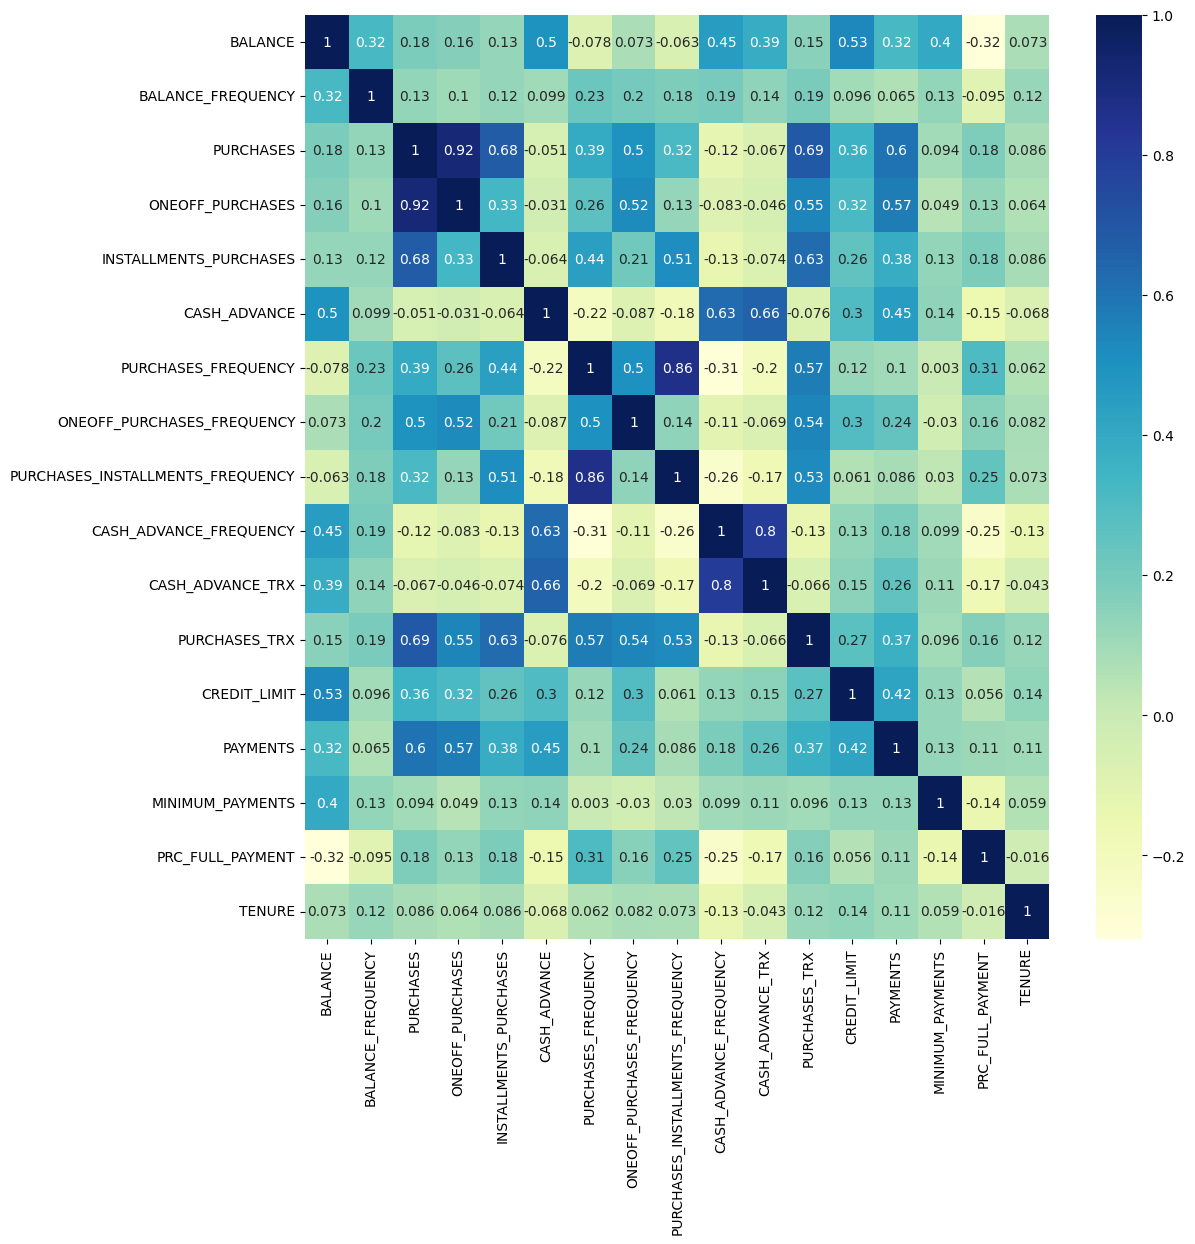

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

1) Balance and Credit_Limit have good realtionship

2) Purchase and One off purchase , Installments purchase have high corelation

3) Purchase Installments Frequence and Online purchase frequenncy.

4) Cash advance frequency and cash advance trx

5)credit limit and payment

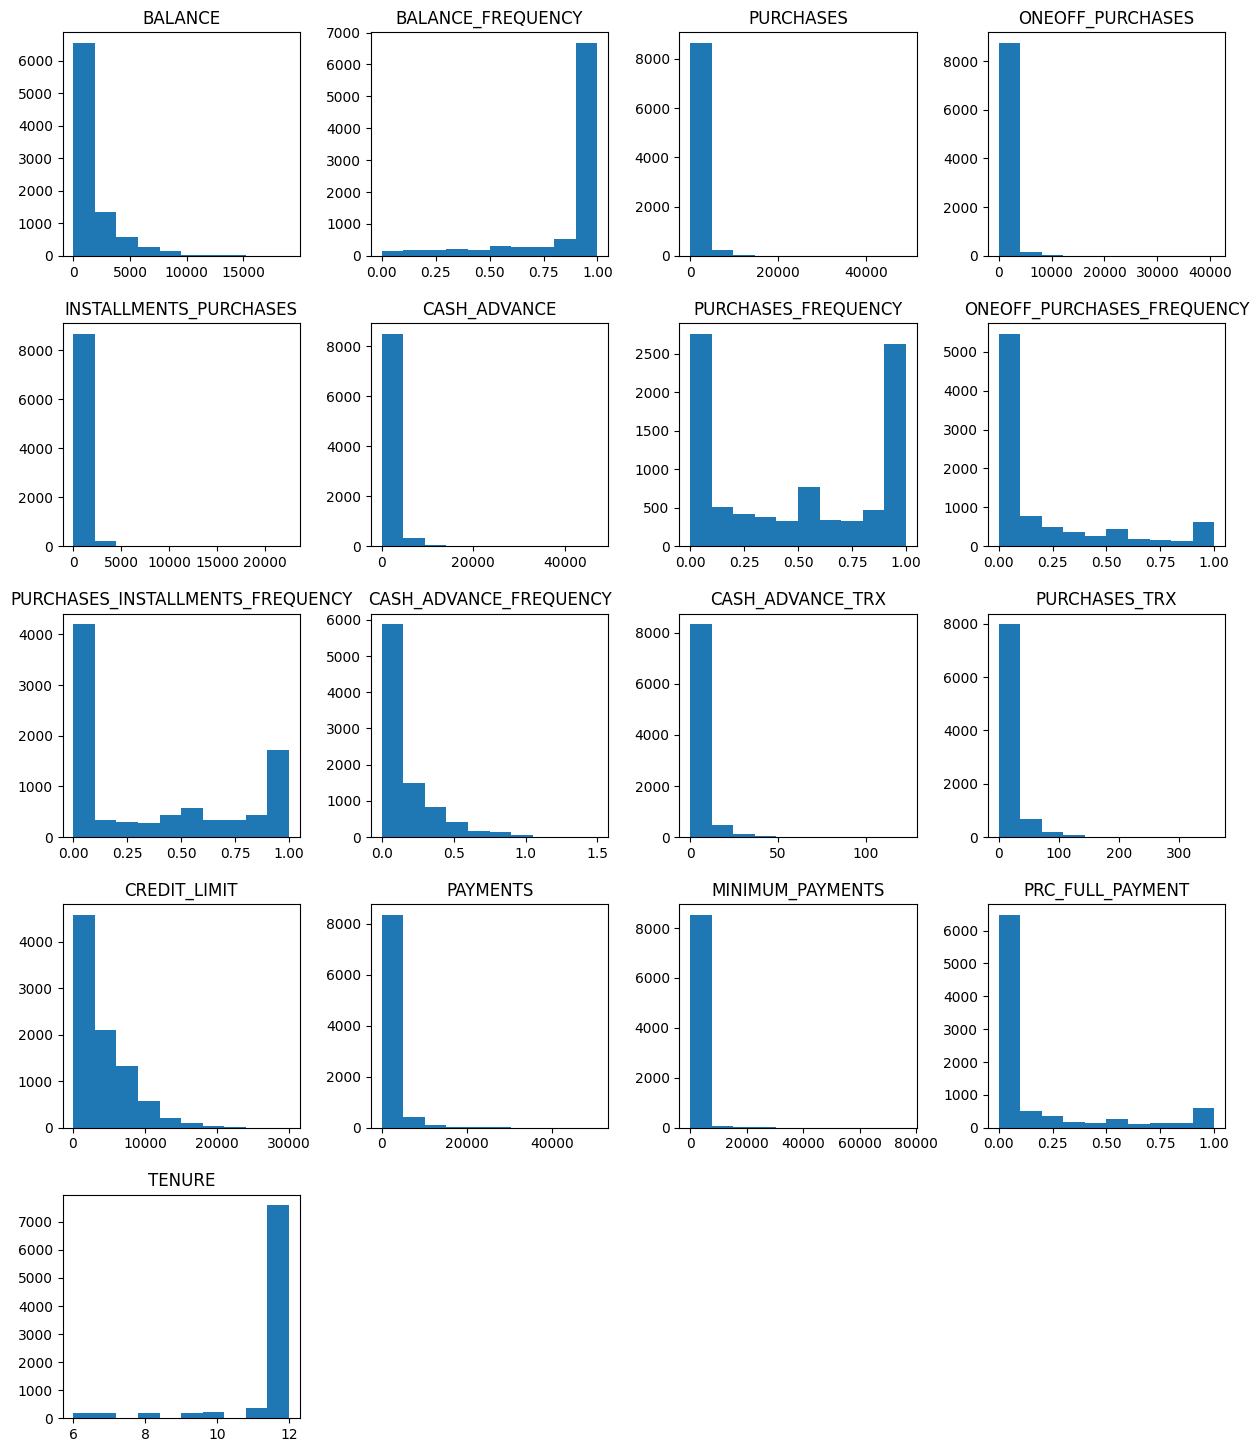

In [ ]:
df.hist(figsize=(15,18),grid=False);

<Axes: xlabel='PAYMENTS', ylabel='PURCHASES'>

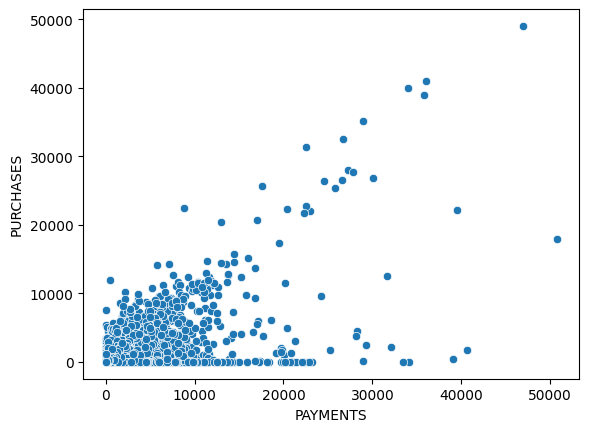

In [ ]:
sns.scatterplot(data=df,y="PURCHASES",x="PAYMENTS")

In [ ]:
df["TENURE"].mean()

11.51731843575419

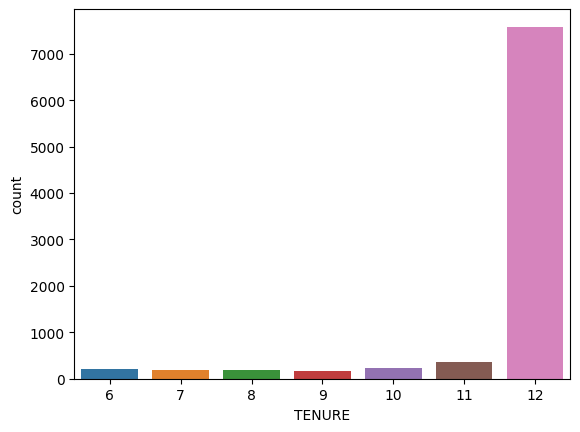

In [ ]:
sns.countplot(data=df,x="TENURE");

<ipython-input-55-f96fbf28d52a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ss=sns.barplot(data=df,x="TENURE",y="PURCHASES_FREQUENCY",ci=False);


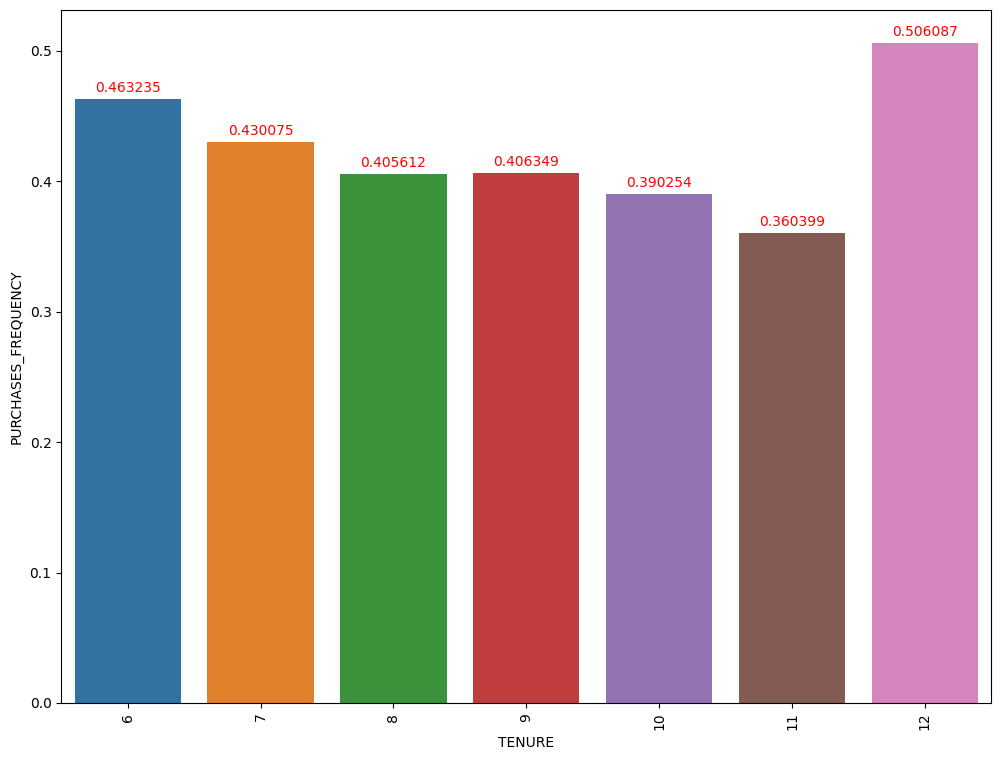

In [ ]:
plt.figure(figsize=(12,9));
ss=sns.barplot(data=df,x="TENURE",y="PURCHASES_FREQUENCY",ci=False);
ss.bar_label(ss.containers[0],padding=3,fontsize=10,color="red");
plt.xticks(rotation=90);

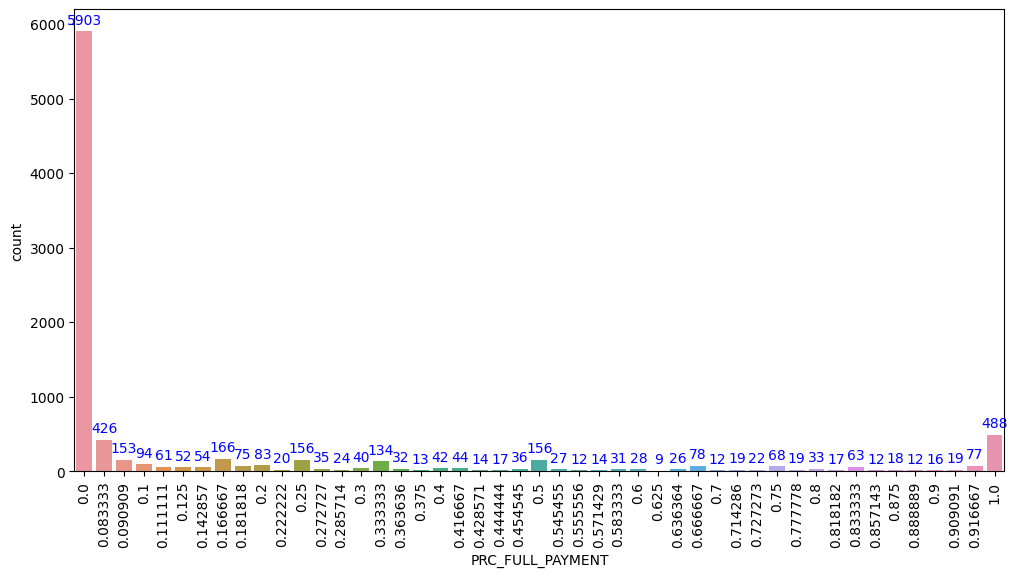

In [ ]:
plt.figure(figsize=(12,6));
ss=sns.countplot(data=df,x="PRC_FULL_PAYMENT");
ss.bar_label(ss.containers[0],padding=3,color='blue',fontsize=10)
plt.xticks(rotation=90);

<ipython-input-45-104b408fe318>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ss=sns.barplot(data=df,x="PRC_FULL_PAYMENT",y="PURCHASES_FREQUENCY",ci=False);


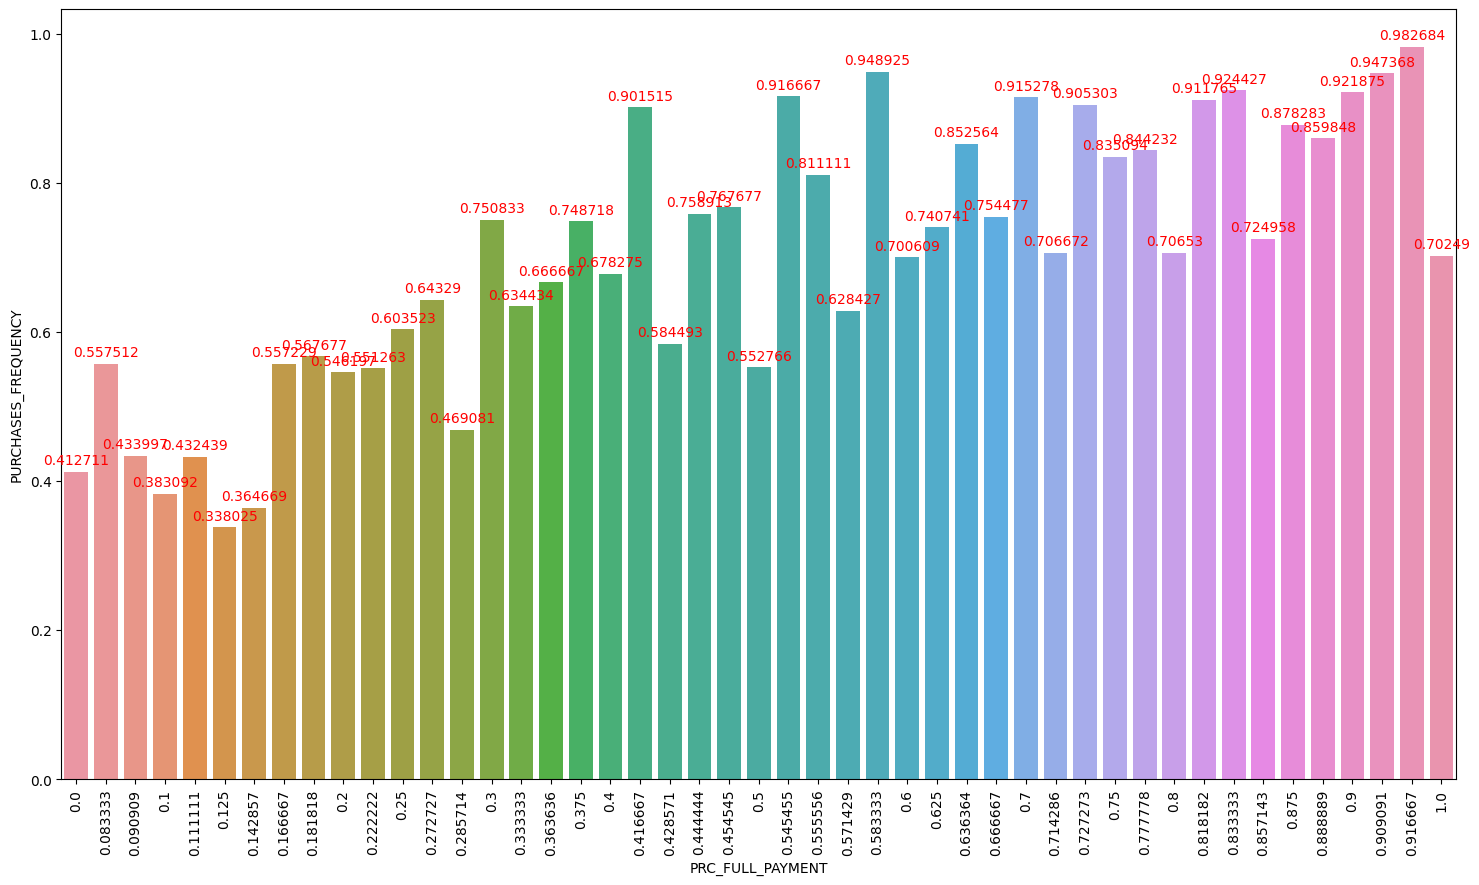

In [ ]:
plt.figure(figsize=(18,10));
ss=sns.barplot(data=df,x="PRC_FULL_PAYMENT",y="PURCHASES_FREQUENCY",ci=False);
ss.bar_label(ss.containers[0],padding=3,fontsize=10,color="red");
plt.xticks(rotation=90);

<ipython-input-51-88950260e40b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ss=sns.barplot(data=df,x="CREDIT_LIMIT",y="PURCHASES_FREQUENCY",ci=False);


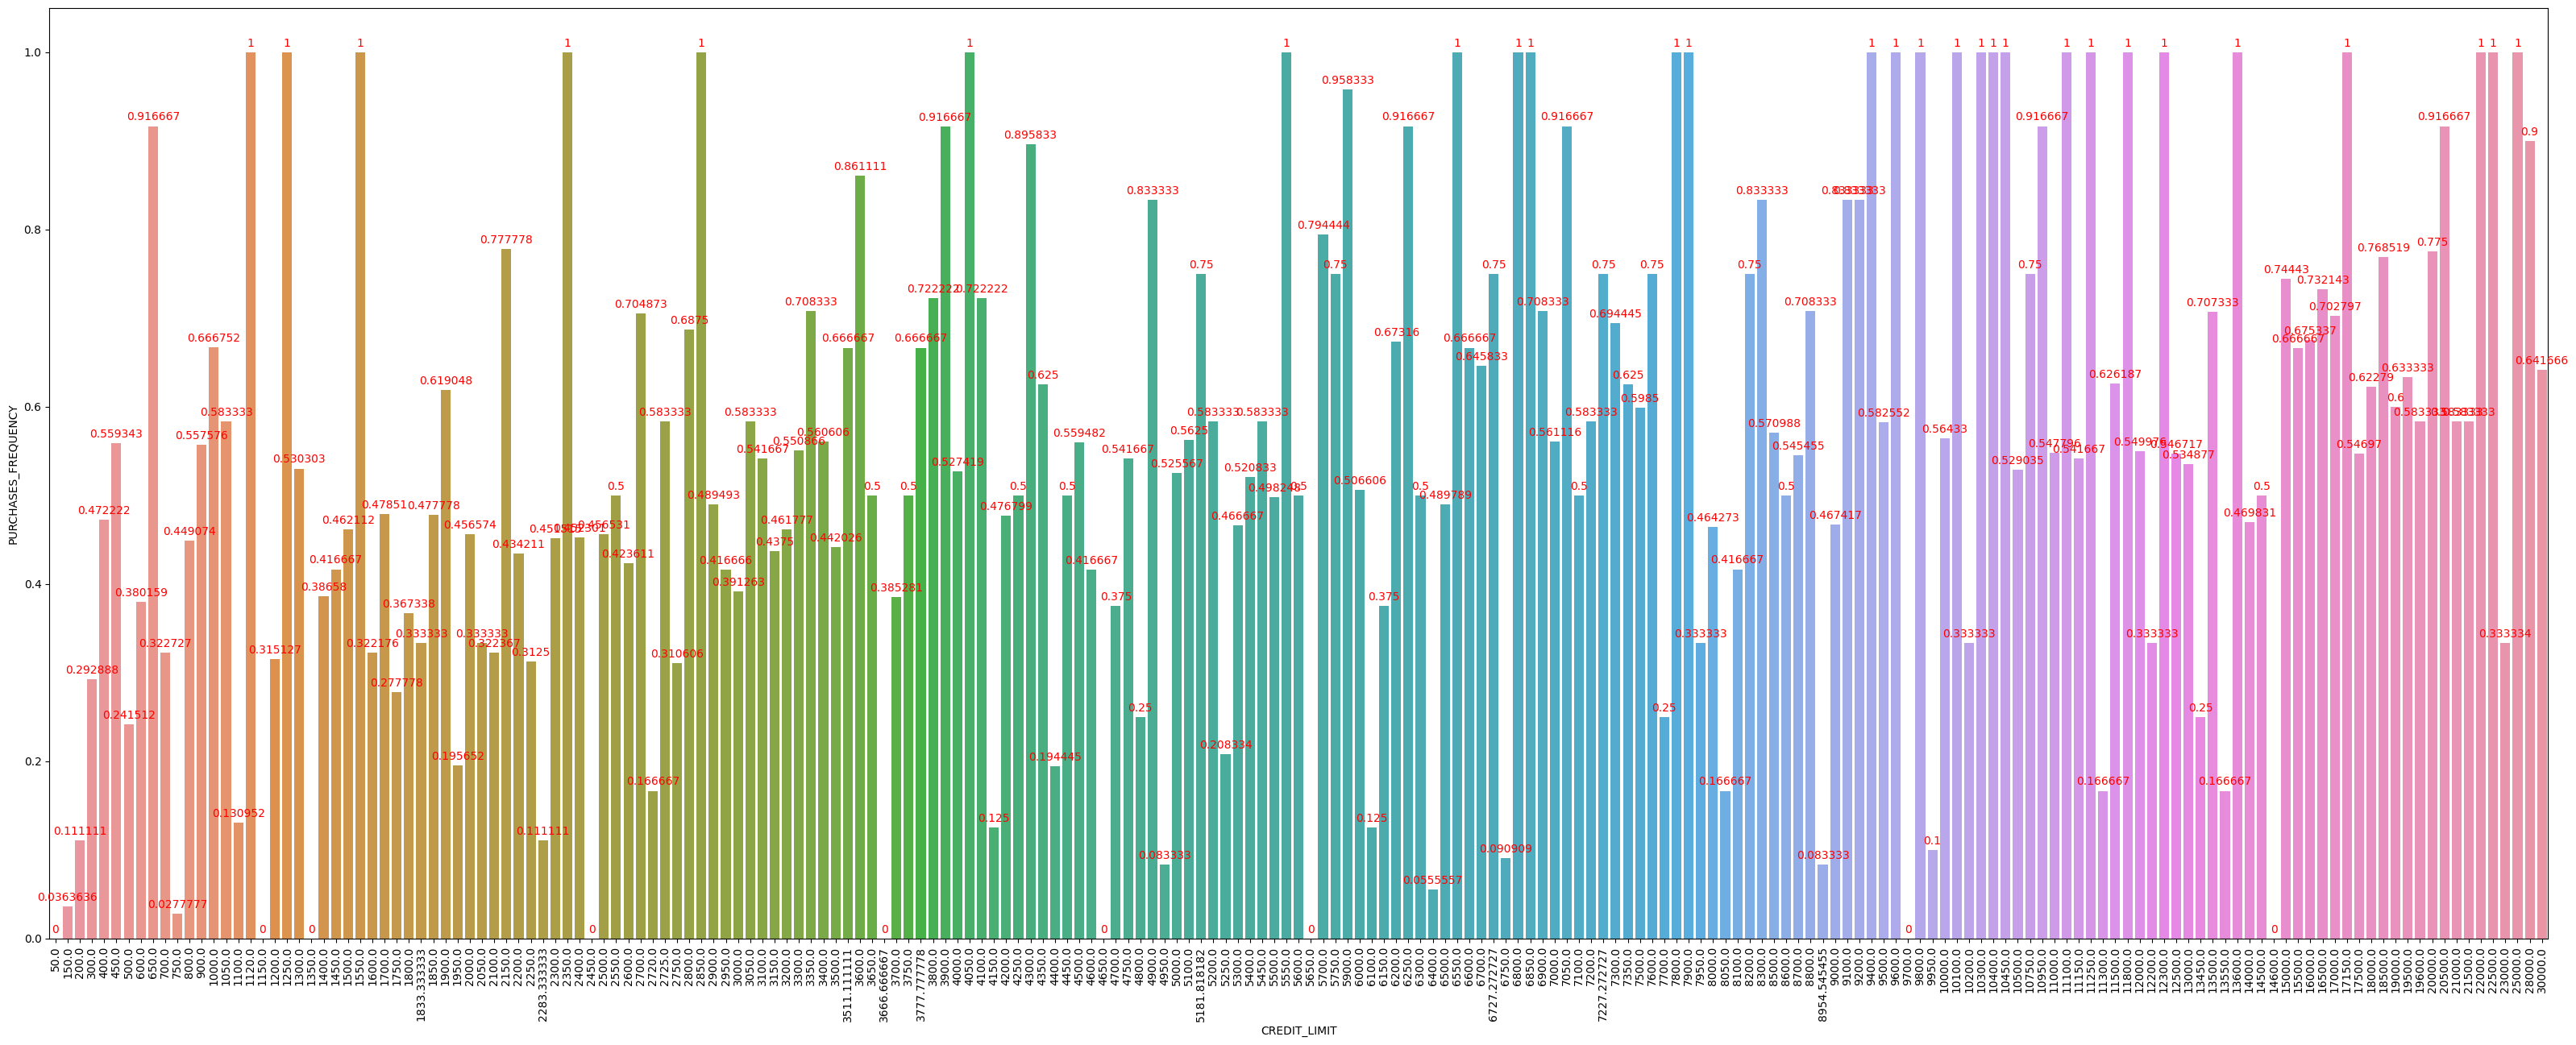

In [ ]:
plt.figure(figsize=(40,15));
ss=sns.barplot(data=df,x="CREDIT_LIMIT",y="PURCHASES_FREQUENCY",ci=False);
ss.bar_label(ss.containers[0],padding=3,fontsize=10,color="red");
plt.xticks(rotation=90);

Higher credit Limit peoples purchases are average

<Axes: >

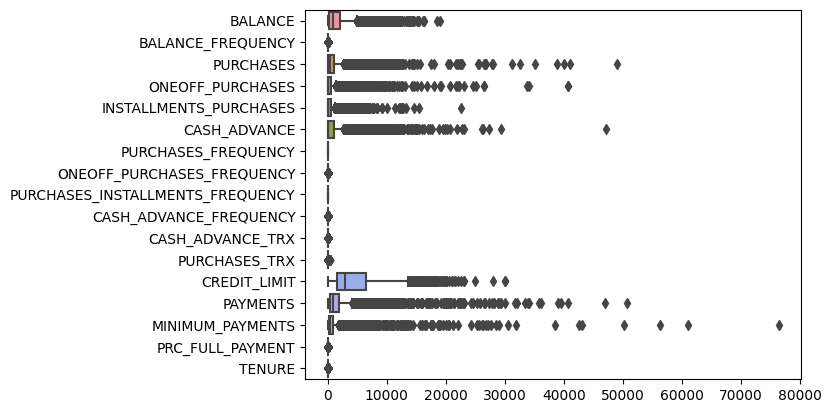

In [ ]:
sns.boxplot(data=df,orient='h')

##5. Outlier Detection

In [10]:
columnss=df.select_dtypes(include=["float64","int64"])
lstnumber=list(columnss.columns.values)
print("The number of outliers columns are",len(lstnumber))

The number of outliers columns are 17


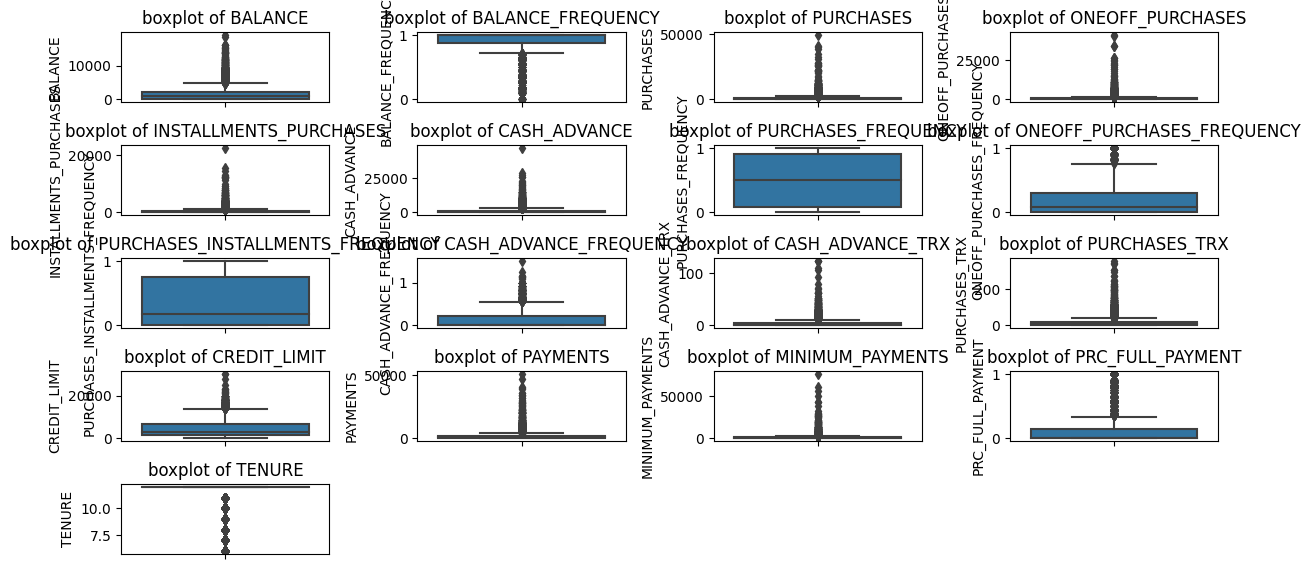

In [11]:
##IDENTIFY THE OUTLIERS
plt.figure(figsize=(12,8))
feature_list=columnss.columns
for i in range (len(feature_list)):
    plt.subplot(7,4,i+1)
    sns.boxplot(y=columnss[feature_list[i]],data=columnss)
    plt.title("boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [12]:
##USING IQR METHOD
def outliers_box(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return lower,upper

In [13]:
##FINDING UPPER AND LOWER
for i in feature_list:
    ll,uu=outliers_box(columnss[i])
    columnss[i]= np.where(columnss[i] > uu,uu, columnss[i])
    columnss[i]= np.where(columnss[i] < ll, ll, columnss[i])

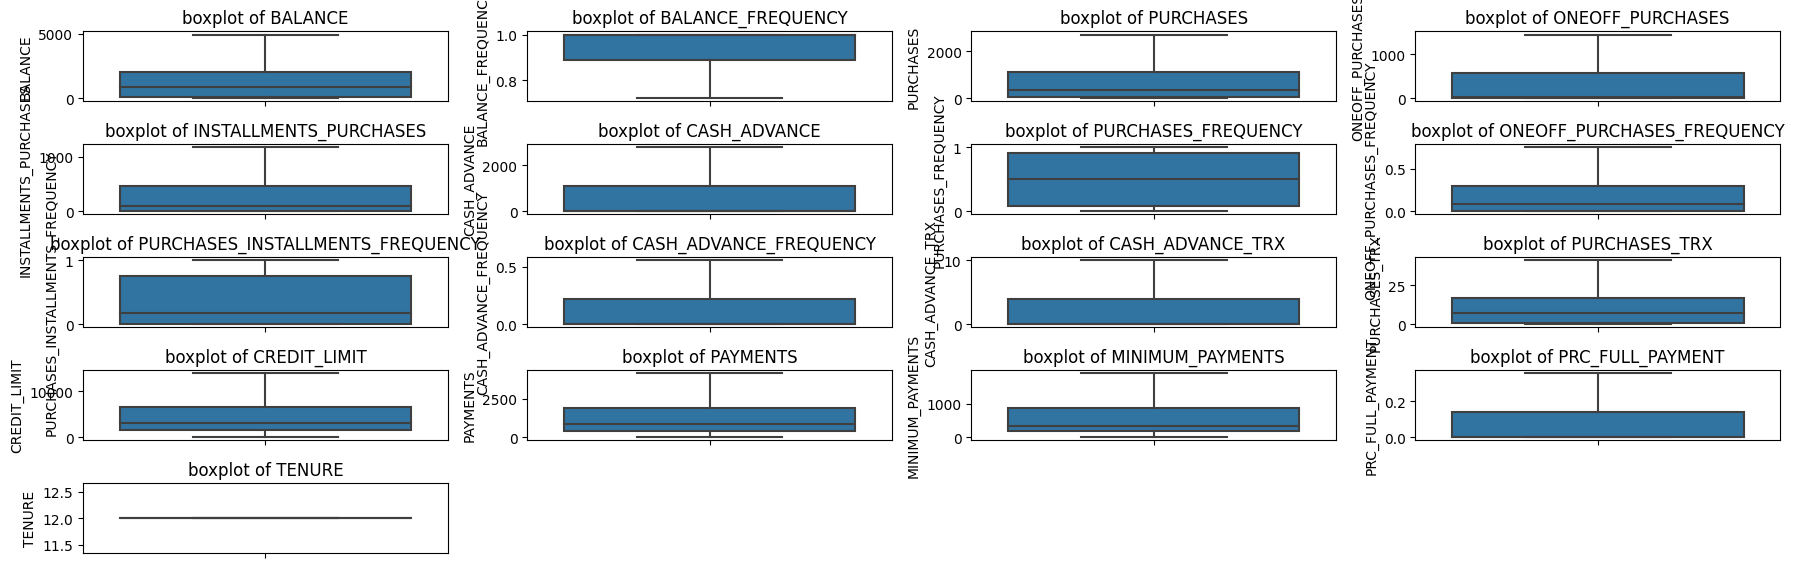

In [14]:
##REMOVING OUTLIER USING IQR
plt.figure(figsize=(18,8))
feature_list=columnss.columns
for i in range (len(feature_list)):
    plt.subplot(7,4,i+1)
    sns.boxplot(y=columnss[feature_list[i]],data=columnss)
    plt.title("boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [15]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df = scalar.fit_transform(columnss)

##6. Dimensionality reduction

In [16]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

pca1      pca2
0 -1.637715 -2.423495
1 -2.215350  2.245515
2  1.168271  0.275078
3 -0.523101 -0.209588
4 -1.657319 -1.642660

##7. Hyperparameter tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

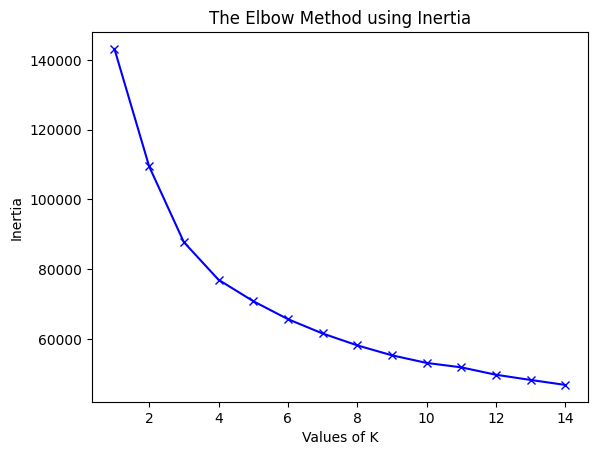

In [17]:
# find 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [18]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [19]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,creditcard_scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.19986371156922428
Spectral Clustering : clusters :  4  silhouette_score :  0.19288115777721193
Spectral Clustering : clusters :  5  silhouette_score :  0.17271961187096724
Spectral Clustering : clusters :  6  silhouette_score :  0.1792865177564009


In [20]:
# Agglomerative clustering
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
  for i in clusters:
    train_Agglomerative(lin,i,creditcard_scaled_df)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.21790013459668714
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.16432982383055342
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.16694333373342657
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.1561796584086786
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.166835290584893
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.16035668115760818
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.146109669110939
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.13595254916616634
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.22854260261868056
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.20391957890

In [21]:
# GaussianMixture Model based clustering
clusters=[3,4,5,6]
for i in clusters:
  train_GaussianMixture(i,creditcard_scaled_df)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.1337088438916313
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.10997072664174044
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.08836256075545879
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.09032850093682834


In [35]:
# Initialize variables to store the best silhouette score and the corresponding k
best_silhouette_score = -1
best_k = -1

# Loop through k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(creditcard_scaled_df)

    # Get cluster assignments
    labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(creditcard_scaled_df, labels)

    # Check if this k has a better silhouette score
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k

print(f"Best k: {best_k}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Create and fit the final KMeans model with the best k
final_kmeans = KMeans(n_clusters=best_k)
final_kmeans.fit(creditcard_scaled_df)


Best k: 3
Best Silhouette Score: 0.23532034410023936


KMeans(n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-366384d4dd33>:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])


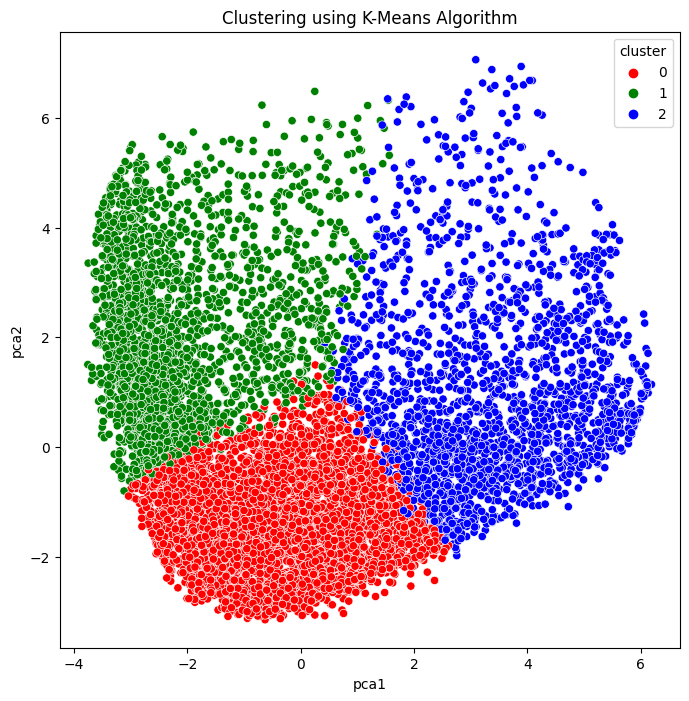

In [22]:
# apply kmeans algorithm
kmeans_model=KMeans(3)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)


# visualize the clustered dataframe
# Scatter Plot
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

<ipython-input-23-41ab0d0ca4d1>:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])


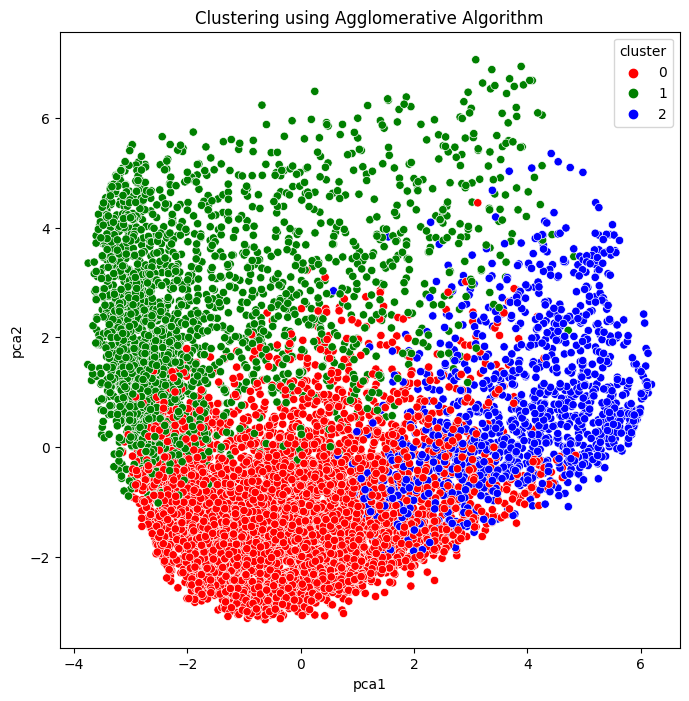

In [23]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=3)
y_pred = agglo_model.fit_predict(creditcard_scaled_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

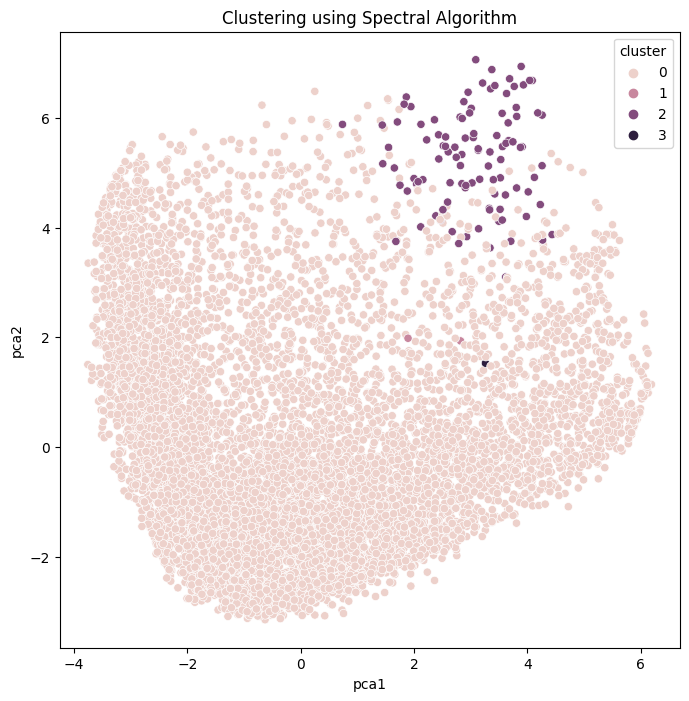

In [24]:
spectral_model = SpectralClustering(n_clusters=4)
y_pred = spectral_model.fit_predict(creditcard_scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
plt.title("Clustering using Spectral Algorithm")
plt.show()

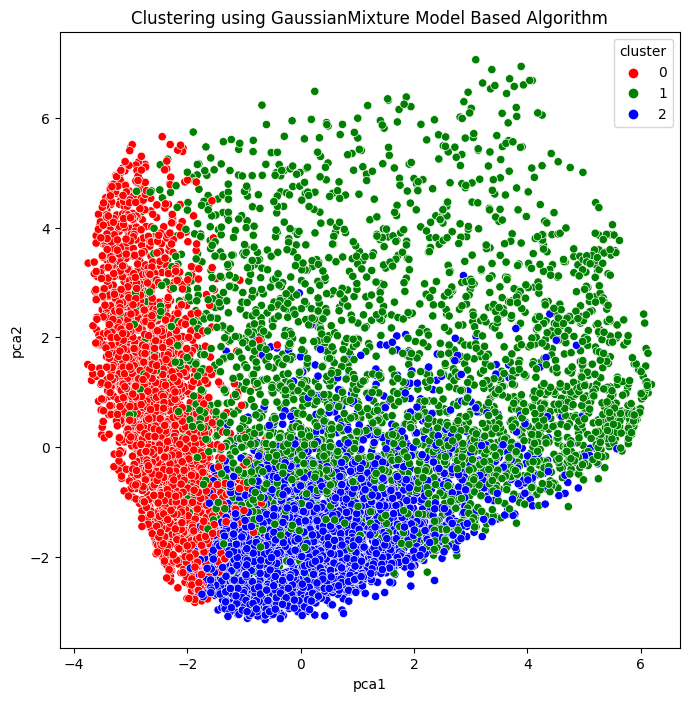

In [25]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(creditcard_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

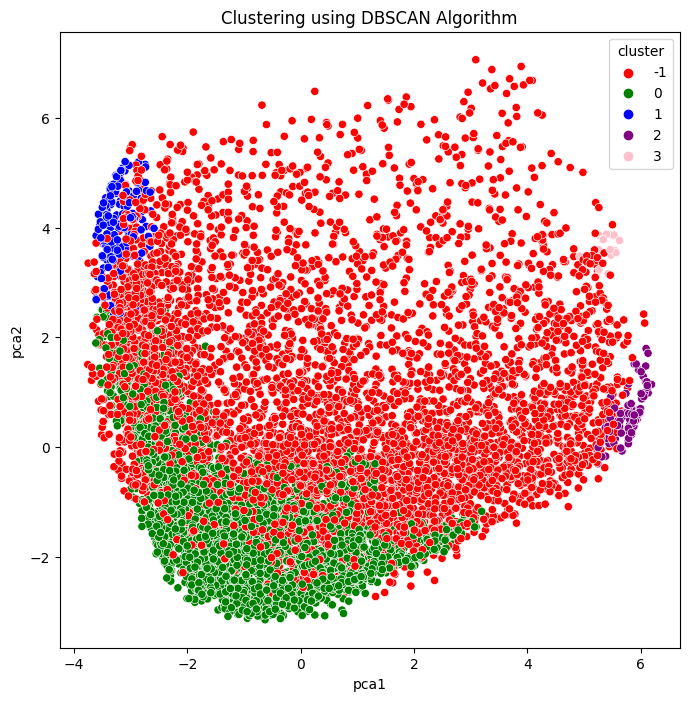

In [26]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(creditcard_scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['red','green','blue','purple','pink'])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

In [27]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[columnss.columns])
# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[columnss.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   563.894557          0.895504   393.038418       176.307979   
1  2745.508372          0.961285   230.068139       140.250022   
2  1712.790807          0.979245  2093.079572      1000.891750   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             205.736633   168.360674            0.459547   
1              77.792631  1914.355828            0.184896   
2             746.850609   395.037216            0.908358   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.104058                         0.347250   
1                   0.078449                         0.109565   
2                   0.488431                         0.693982   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.042269         0.652742      7.409487  3051.200947   
1               0.339833         6.695690      3.509914  5374.535005   
2               0.071566         1.374140     30.401180  6421.107089   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0   693.874562       356.355491         0.098943   12.0  
1  1726.690860       986.516961         0.027251   12.0  
2  2390.085052       682.000726         0.129144   12.0

In [28]:
cluster_centers
# create a column as "cluster" & store the respective cluster name that they belongs to
creditcard_cluster_df = pd.concat([columnss,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
creditcard_cluster_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000    12.0        0  
1  4103.032597       1072.340217          0.222222    12.0        1  
2   622.066742        627.284787          0.000000    12.0        2  
3     0.000000        864.206542          0.000000    12.0        0  
4   678.334763        244.791237          0.000000    12.0        0

In [32]:
#WARD METHOD BY LINKAGE
wardlink=linkage(creditcard_scaled_df,method="ward")

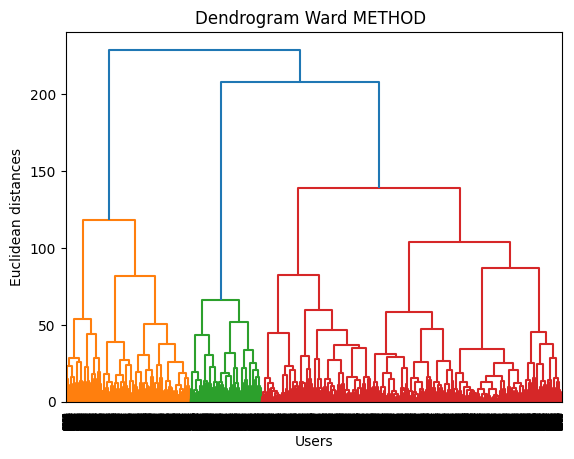

In [33]:
#DENDROGRAM
dend=dendrogram(wardlink)
plt.title('Dendrogram Ward METHOD ')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()

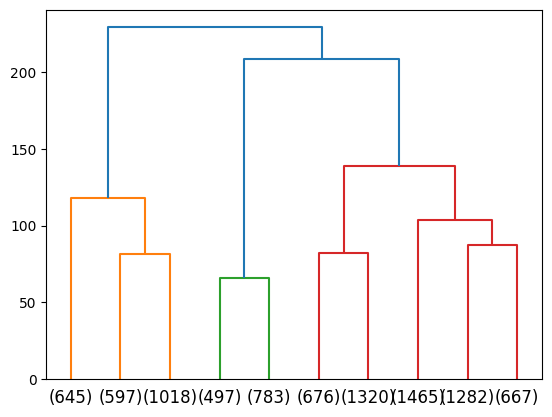

In [34]:
##DENDROGRAM FOR LAST 10
dend=dendrogram(wardlink, truncate_mode='lastp',p=10)

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming your data is stored in X

silhouette_scores = []

for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(creditcard_scaled_df)
    silhouette_avg = silhouette_score(creditcard_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the value of k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2  # Add 2 to account for the starting cluster number

print("Silhouette scores for k=2 to 11:", silhouette_scores)
print("Best k:", best_k)


Silhouette scores for k=2 to 11: [0.2332499435491929, 0.23555693443463832, 0.20972096626383113, 0.19959025818987788, 0.20355118889538784, 0.20536560026500691, 0.20044698077489856, 0.1964488696143048, 0.1960484029112158, 0.19777664426498634]
Best k: 3


In [37]:
# saving the dataframe
df.to_csv('file1.csv')

In [39]:
file_path = '/content/drive/My Drive/file1.csv'

In [40]:
df.to_csv(file_path, index=False)


**Cluster 0 (Cluster Label: 0):**




**Balance:** This cluster has a relatively low average balance of around 40.90.

**Purchase Behavior:** Customers in this cluster have made some purchases, with a low purchase frequency.

**Cash Advances:** They haven't used cash advances much (Cash Advance Frequency is low).

**Payment Behavior:** Most customers in this cluster don't make any one-off purchases.

**Credit Limit:** The average credit limit is 1000.0.

**Tenure:** Customers in this cluster have a tenure of 12 months.



**Recommendations for Cluster 0:**



**Engagement:** These customers have relatively low balances and purchase activity. You might consider implementing targeted marketing campaigns to encourage more frequent purchases.

**Credit Building:** As the credit limits are relatively low, consider offering credit limit increases to responsible customers in this cluster to encourage spending.

**Education:** Provide educational resources on how to make the most of their credit card, including benefits like rewards and cashback.



**Cluster 1 (Cluster Label: 1):**



**Balance:** This cluster has a high average balance of around 3202.47.

**Purchase Behavior:** Customers in this cluster have made no purchases (Purchase Amount is 0.00).

**Cash Advances:** They frequently use cash advances (Cash Advance Frequency is high).

**Payment Behavior:** They make occasional payments but don't often make full payments (PRC_FULL_PAYMENT is 0.22).

**Credit Limit:** The average credit limit is 7000.0.

**Tenure:** Customers in this cluster have a tenure of 12 months.



**Recommendations for Cluster 1:**


**Credit Management:** Focus on educating customers in this cluster about responsible credit card use, including paying off their balances and avoiding excessive cash advances.

**Rewards Program:** Consider implementing a rewards program for responsible credit use, encouraging them to make purchases and pay off their balances.

**Credit Limit Control:** Monitor and potentially lower credit limits for customers who consistently use cash advances and don't make purchases.



**Cluster 2 (Cluster Label: 2):**



**Balance:** This cluster has a moderate average balance of around 2495.15.

**Purchase Behavior:** Customers in this cluster make purchases frequently, with a high purchase frequency.

**Cash Advances:** They don't use cash advances.

**Payment Behavior:** Most customers in this cluster don't make one-off purchases, but they have a good payment behavior with a PRC_FULL_PAYMENT of 0.0.

**Credit Limit:** The average credit limit is 7500.0.

**Tenure:** Customers in this cluster have a tenure of 12 months.



**Recommendations for Cluster 2:**



**Retention and Engagement:** Focus on retaining these customers by offering loyalty rewards, as they have good payment behavior and frequently use their credit cards.

**Credit Limit Management:** Consider offering credit limit increases to encourage more spending for responsible customers in this cluster.

**Personalized Services:** Offer personalized services and promotions to encourage more one-off purchases.